# Orthopedics Dataset - Exploratory Data Analysis 


## Notes and References
- Link to Source Data: http://archive.ics.uci.edu/ml/datasets/vertebral+column
- Link to additional azure inforamtion on GitHub: https://github.com/van-william/azure-ml-demo
- Link to additional web app inforamtion: https://github.com/van-william/flask_app_ml/tree/main/notebooks

# Import Libraries and Initial Setup

In [6]:
#Standard Python ML Libraries
import logging
import json
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import arff
import requests, zipfile
from IPython.display import Image
from IPython.display import display
import sys
import math
import numpy as np
import seaborn as sns
import random
random.seed(42)

In [17]:
# Custom Heatmap Plot
# Source: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
def corr_plot(df):
    corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 10))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 11, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Extract Data from UCI Site in python

In [18]:
f_zip = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00212/vertebral_column_data.zip'

# Download the data
r = requests.get(f_zip)

# Write the zip file to the azure machine learning
with open('./ortho-zip.zip', 'wb') as f:
    f.write(r.content)

# Open and unzip the file
with zipfile.ZipFile('./ortho-zip.zip', 'r') as zip:
    # printing all the contents of the zip file
    #print('directory: \n')
    #zip.printdir()
    # extracting all the files
    zip.extractall()

# Load the .arff file
data_dict = arff.load(open('./column_3C_weka.arff'))
# Create a pandas dataframe from the .arff file
data_arff = data_dict["data"]
attributes = data_dict['attributes']
features = [item[0] for item in attributes]
ortho_3C_df = pd.DataFrame(data = data_arff, columns = features)
ortho_3C_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


## Initial Exploratory Data Analysis (EDA)

In [19]:
ortho_3C_df.describe(include = 'all')

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,Spondylolisthesis
freq,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


In [20]:
ortho_3C_df.drop(columns='class').std() / ortho_3C_df.drop(columns='class').mean()

pelvic_incidence            0.284917
pelvic_tilt                 0.570509
lumbar_lordosis_angle       0.357283
sacral_slope                0.312501
pelvic_radius               0.112935
degree_spondylolisthesis    1.428279
dtype: float64

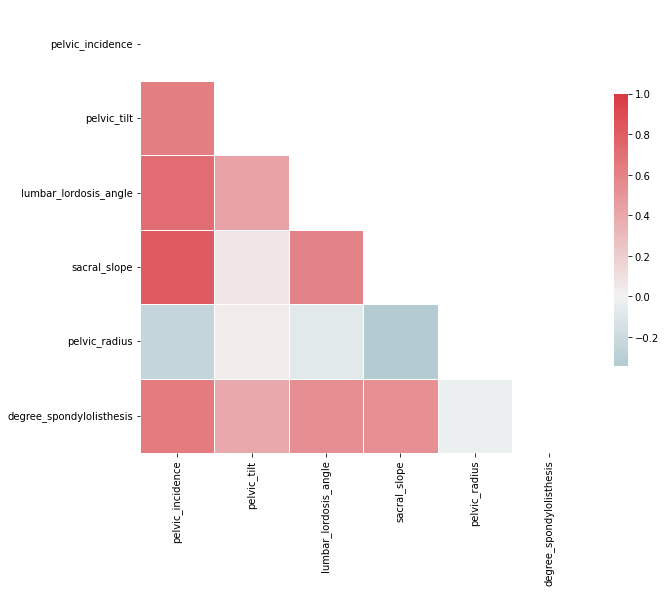

In [21]:
corr_plot(ortho_3C_df)

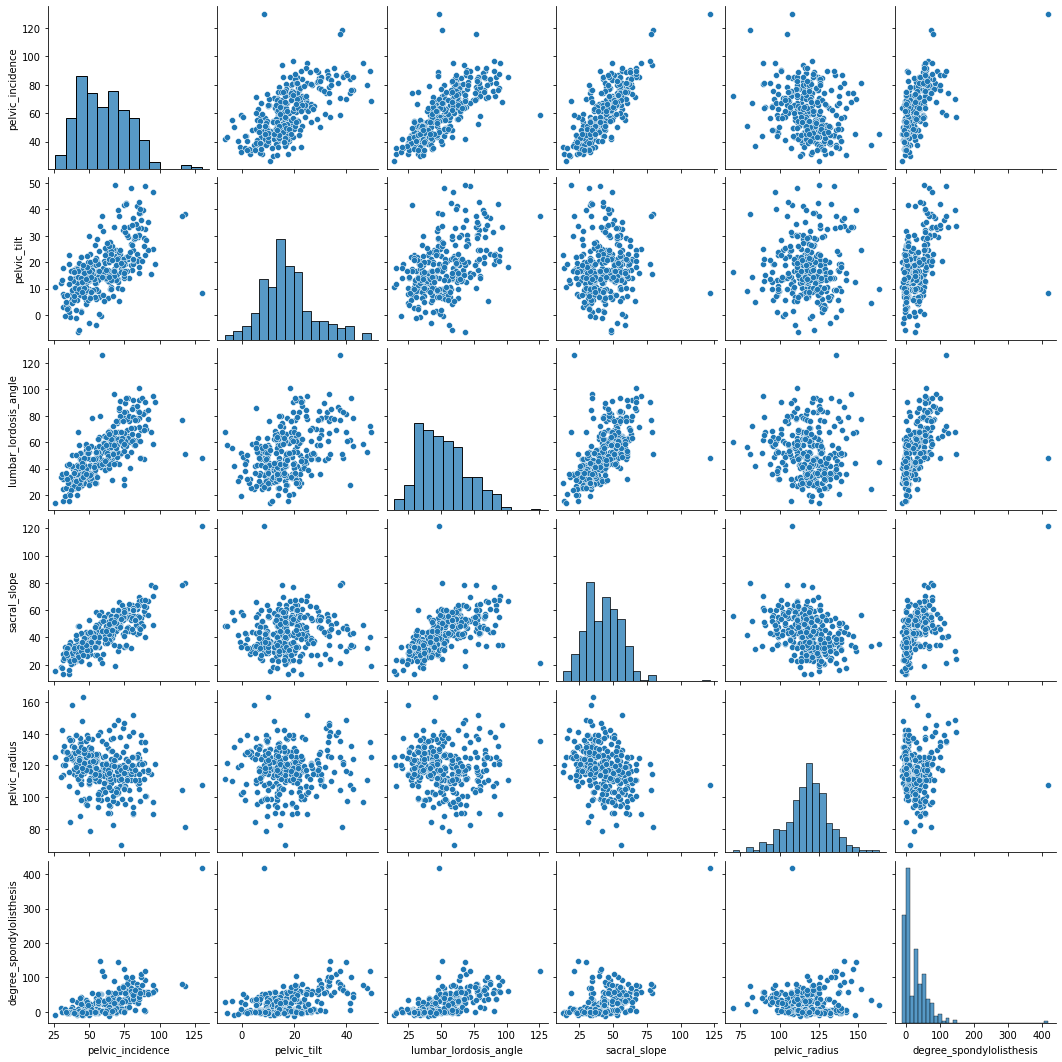

In [22]:
sns.pairplot(ortho_3C_df)

### Try PCA for visualization

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca_df = ortho_3C_df[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
pca = PCA(n_components=2)
scaler = StandardScaler()
scaled_df = scaler.fit_transform(pca_df)
pca_dimensions_scaled = pd.DataFrame(data = pca.fit_transform(scaled_df), columns = ['PC1', 'PC2'])
clustered_scaled_df = pd.concat([ortho_3C_df, pca_dimensions_scaled], axis=1, join="inner")

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

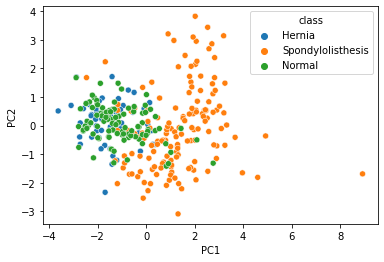

In [24]:
sns.scatterplot(data=clustered_scaled_df, x="PC1", y="PC2", hue="class")